In [3]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
code = os.path.abspath("../code")
sys.path.append(code)
import slime
import importlib

import time

slime = importlib.reload(slime)

# Sensor offset vs. coverage %
so = np.array([3, 9, 15, 21, 27])
# so = np.array([9])
pop = np.linspace(0.1, 0.9, 9)
# pop = [0.1]

width = 100

plot = np.empty((len(so)*width, len(pop)*width))
x = 0
y = 0
for offset in so:
    for p in pop:
        start = time.time()

        sm = slime.Mould(width, sensor_offset=offset, coverage=p)
        sm.evolve(100)
        cy = y*width
        cx = x*width
        plot[cy:cy+width, cx:cx+width] = sm.pheromones()
        x += 1

        end = time.time()

        print(f"Done offset {offset} with pop% {p} in {end-start} seconds")
    x = 0
    y += 1


Done offset 3 with pop% 0.1 in 12.507566928863525 seconds
Done offset 3 with pop% 0.2 in 16.54502296447754 seconds
Done offset 3 with pop% 0.30000000000000004 in 20.30679488182068 seconds
Done offset 3 with pop% 0.4 in 24.485528707504272 seconds
Done offset 3 with pop% 0.5 in 23.50358295440674 seconds
Done offset 3 with pop% 0.6 in 30.22613000869751 seconds
Done offset 3 with pop% 0.7000000000000001 in 32.375898122787476 seconds
Done offset 3 with pop% 0.8 in 41.55212211608887 seconds
Done offset 3 with pop% 0.9 in 42.42502999305725 seconds
Done offset 9 with pop% 0.1 in 13.777628898620605 seconds
Done offset 9 with pop% 0.2 in 18.590343952178955 seconds
Done offset 9 with pop% 0.30000000000000004 in 23.767525911331177 seconds
Done offset 9 with pop% 0.4 in 27.462130784988403 seconds
Done offset 9 with pop% 0.5 in 23.749180793762207 seconds
Done offset 9 with pop% 0.6 in 31.11818289756775 seconds
Done offset 9 with pop% 0.7000000000000001 in 33.633605003356934 seconds
Done offset 9 wit

In [7]:
# This cell normalizes each "image" so that higher concentrations in one image
# don't skew lower concentrations in another image

x=0
y=0
pl = np.empty_like(plot)
for offset in so:
    for p in pop:
        cy = y*width
        cx = x*width
        pl[cy:cy+width, cx:cx+width] = plot[cy:cy+width, cx:cx+width]/np.max(plot[cy:cy+width, cx:cx+width])
        x += 1
    x = 0
    y += 1

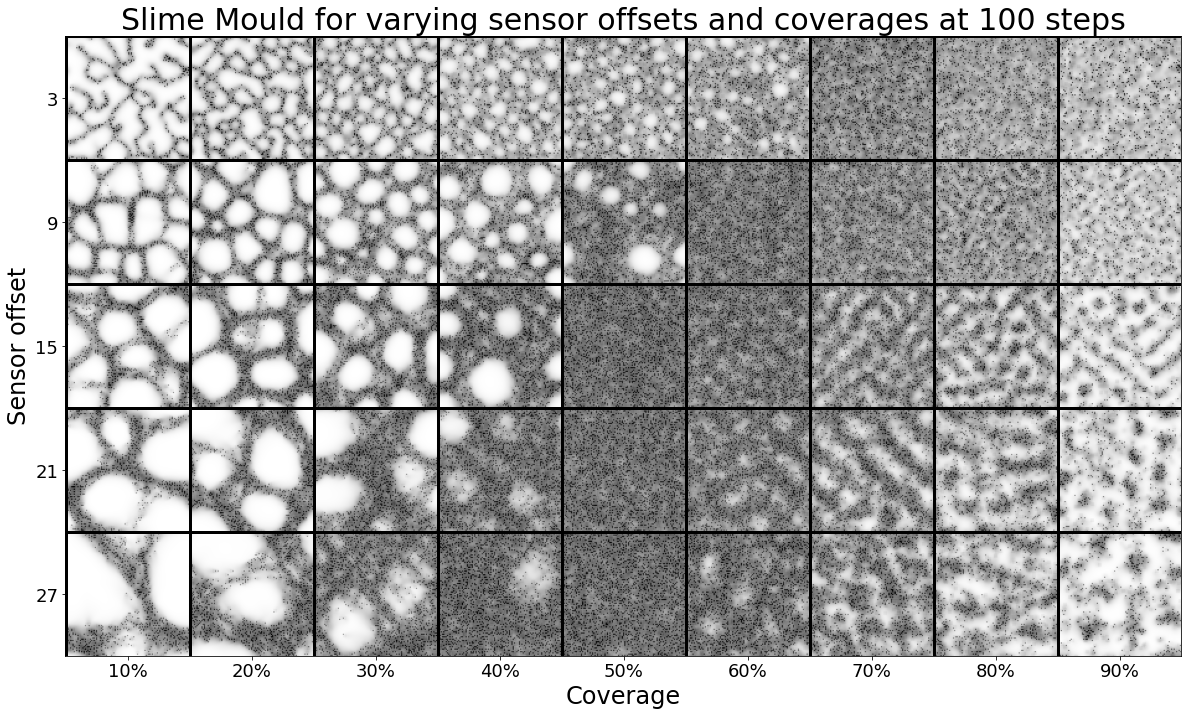

In [9]:
fig, ax = plt.subplots(figsize=(20,27))
# plt.imshow(plot, cmap='gray_r')
plt.imshow(pl, cmap='gray_r')
ax.set_xticks(np.linspace(0, (len(pop)-1)*width, len(pop))+width/2)
ax.set_yticks(np.linspace(0, (len(so)-1)*width, len(so))+width/2)
ax.set_xticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'], fontsize=18)
ax.set_yticklabels(so,  fontsize=18)
ax.set_xlabel('Coverage', fontsize=24)
ax.set_ylabel('Sensor offset', fontsize=24)
ax.set_title('Slime Mould for varying sensor offsets and coverages at 100 steps', fontsize=30)
for i in range(len(pop)):
    plt.axvline(x=i*width, color='black', linewidth=3)

for i in range(len(so)):
    plt.axhline(y=i*width, color='black', linewidth=3)

plt.gca().set_aspect(1)
ax.grid(linewidth=1, which='minor')
plt.show()